In [56]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
train_df = pd.read_csv('D:/学习资料/机器学习/bike-sharing-demand/train.csv')
test_df = pd.read_csv('D:/学习资料/机器学习/bike-sharing-demand/test.csv')

In [59]:
print(train_df.shape)
print(test_df.shape)

(10886, 12)
(6493, 9)


In [60]:
train_df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [62]:
test_df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.0013
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.0012
9,2011-01-20 09:00:00,1,0,1,2,9.84,11.365,52,15.0013


In [63]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [64]:
#在datatime列中分别存储年、月、日、时、日值 
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
test_df['datetime'] = pd.to_datetime(test_df['datetime'])

train_df['year'] = train_df['datetime'].apply(lambda x: x.year)
train_df['month'] = train_df['datetime'].apply(lambda x: x.month)
train_df['day'] = train_df['datetime'].apply(lambda x: x.day)
train_df['hour'] = train_df['datetime'].apply(lambda x: x.hour)

test_df['year'] = test_df['datetime'].apply(lambda x: x.year)
test_df['month'] = test_df['datetime'].apply(lambda x: x.month)
test_df['day'] = test_df['datetime'].apply(lambda x: x.day)
test_df['hour'] = test_df['datetime'].apply(lambda x: x.hour)

In [65]:
train_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [66]:
test_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


In [67]:
#通过添加年、月、日、小时来删除日期时间。
# casual 和registry 列也被删除，因为它们不在测试数据中。 
train_df = train_df.drop(['datetime', 'casual', 'registered'], axis=1)
test_df = test_df.drop(['datetime'], axis=1)

In [68]:
train_df.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


In [69]:
test_df.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


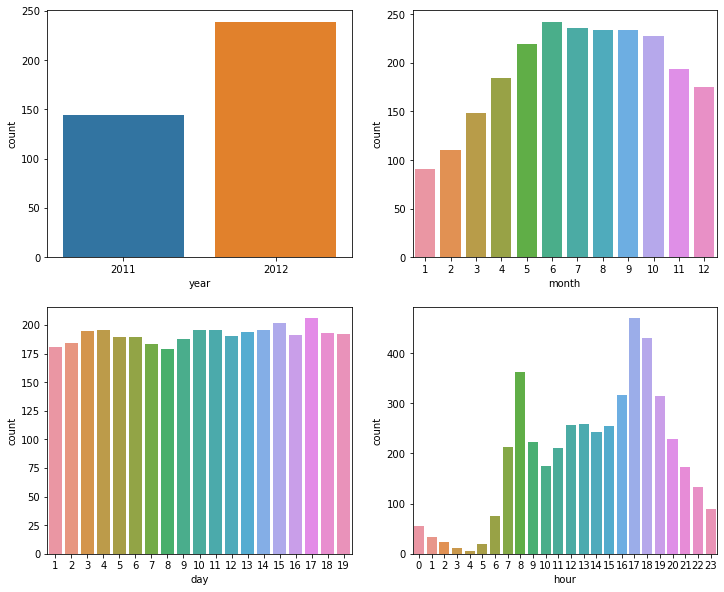

In [70]:
#通过图形找出每个特征的特征 

# 按年、月、日和时间确定出租次数。
# 按年份计算 
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='year',y='count',data=train_df.groupby('year')['count'].mean().reset_index())

#每月计数 
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='month',y='count',data=train_df.groupby('month')['count'].mean().reset_index())

# 按日期计数 
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='day',y='count',data=train_df.groupby('day')['count'].mean().reset_index())

# 按时间计数 
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='hour',y='count',data=train_df.groupby('hour')['count'].mean().reset_index())

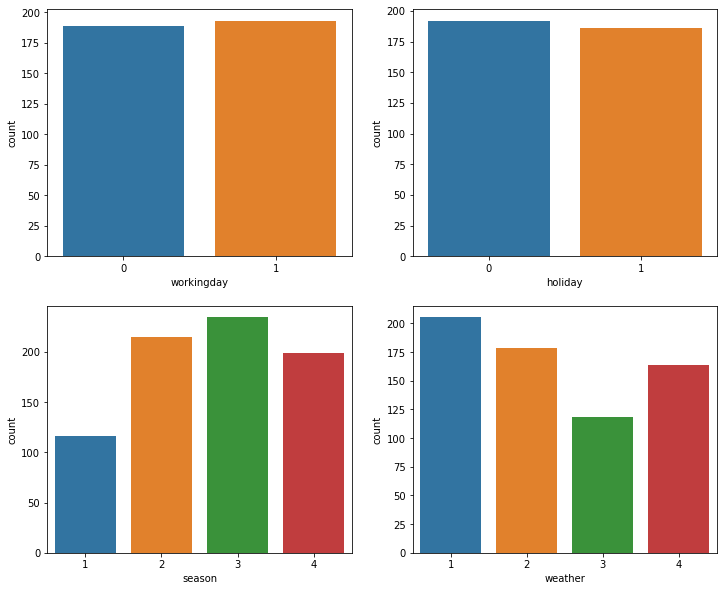

In [71]:
# 按季节、节假日、工作日和天气确定出租数量 
fig = plt.figure(figsize=[12,10])

#按WorkingDay计数
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='workingday',y='count',data=train_df.groupby('workingday')['count'].mean().reset_index())

#按HolidayDay计数
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday',y='count',data=train_df.groupby('holiday')['count'].mean().reset_index())

#按SeasongDay计数
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='season',y='count',data=train_df.groupby('season')['count'].mean().reset_index())

#按WeatherDay计数
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather',y='count',data=train_df.groupby('weather')['count'].mean().reset_index())

In [72]:
train_df.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
5,1,0,0,2,9.84,12.880,75,6.0032,1,2011,1,1,5
6,1,0,0,1,9.02,13.635,80,0.0000,2,2011,1,1,6
7,1,0,0,1,8.20,12.880,86,0.0000,3,2011,1,1,7
8,1,0,0,1,9.84,14.395,75,0.0000,8,2011,1,1,8
9,1,0,0,1,13.12,17.425,76,0.0000,14,2011,1,1,9


In [73]:
# windspeed中有连续的0个值，所以按值查count
train_df['windspeed'].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

<AxesSubplot:title={'center':'< Test Data Windspeed >'}, xlabel='windspeed', ylabel='count'>

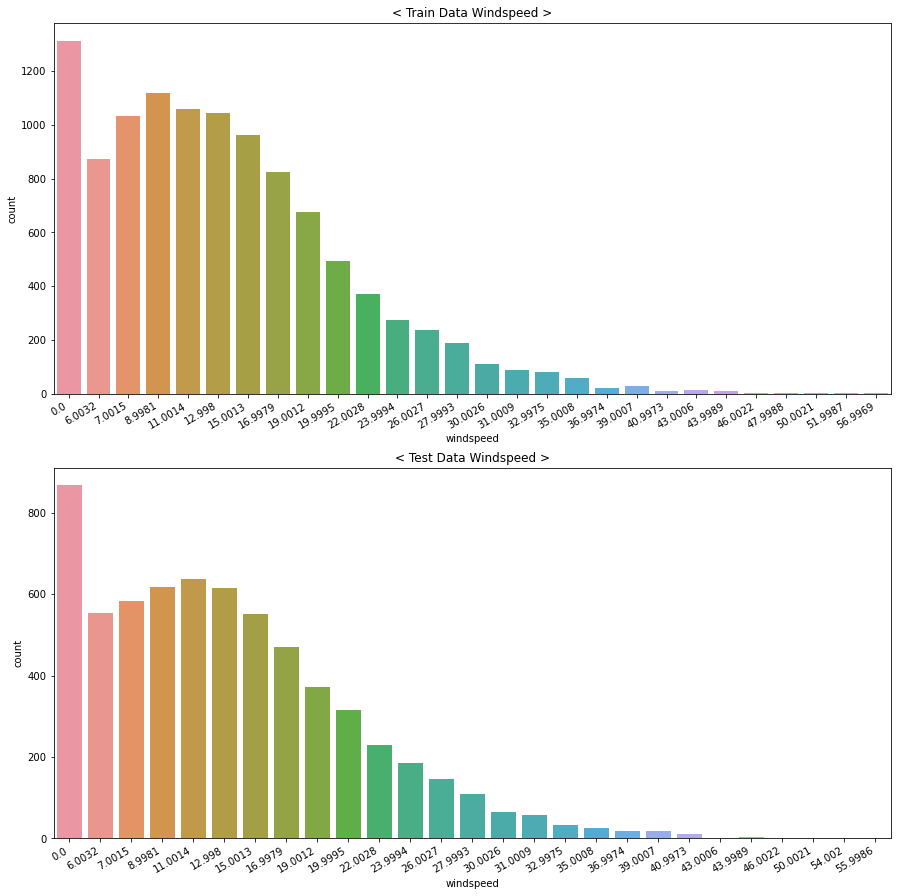

In [74]:
# 查看风速图的结果，Train和Test都有很多0值。 
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(15,15)

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='Count',title="< Train Data Windspeed >")
sns.countplot(data=train_df, x="windspeed", ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count',title="< Test Data Windspeed >")
sns.countplot(data=test_df, x="windspeed", ax=axes[1])

In [75]:
# 简单地求平均值并把它放在风速为0的行中。 
train_df.loc[train_df["windspeed"] == 0, "windspeed"] = train_df["windspeed"].mean()
test_df.loc[test_df["windspeed"] == 0, "windspeed"] = test_df["windspeed"].mean()

<AxesSubplot:title={'center':'< Test Data Windspeed >'}, xlabel='windspeed', ylabel='count'>

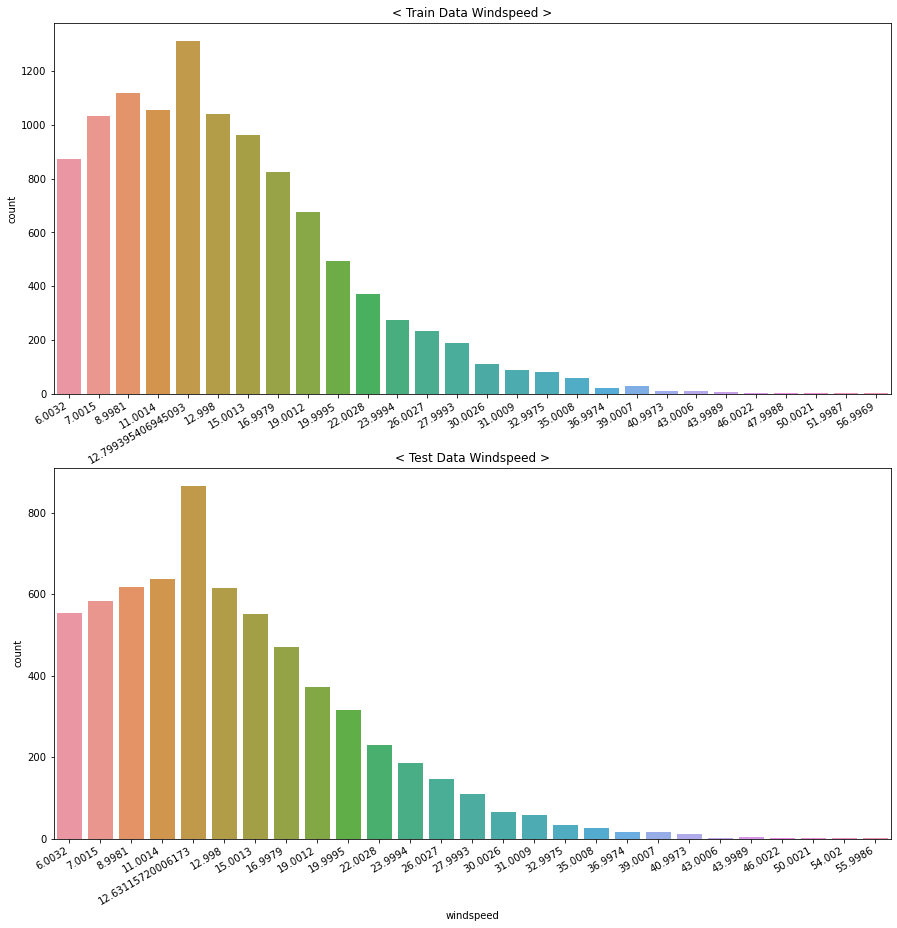

In [76]:
# 修正风速值后查看图表 
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(15,15)

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='Count',title="< Train Data Windspeed >")
sns.countplot(data=train_df, x="windspeed", ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count',title="< Test Data Windspeed >")
sns.countplot(data=test_df, x="windspeed", ax=axes[1])

D:\Anacond\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

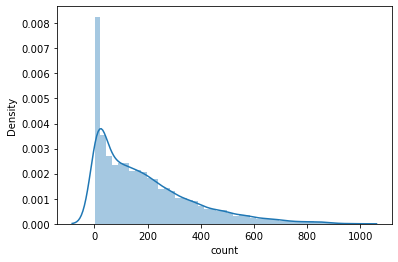

In [77]:
#检查目标（计数）值的分布</br>
#目标值的分布最好采用正态分布的形式。</br> 否则，如果失真，则回归预测性能可能会变差。
sns.distplot(train_df['count'])

D:\Anacond\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

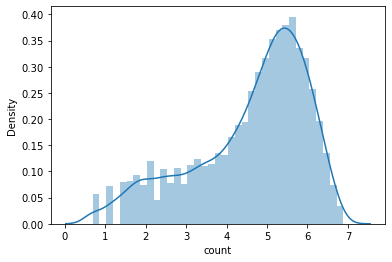

In [78]:
#由于计数值不是正态分布的形式，因此通过应用对数值（正态分布）进行转换 
sns.distplot(np.log1p(train_df['count']))

In [79]:
#更改前的计数值 
train_df['count']

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [80]:
# 日志应用后的计数值
train_df['count'] = np.log1p(train_df['count'])
train_df['count']

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
10881    5.820083
10882    5.488938
10883    5.129899
10884    4.867534
10885    4.488636
Name: count, Length: 10886, dtype: float64

In [81]:
#模型选择
#线性回归模型
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [82]:
# Kaggle 的性能评价指标是 RMSLE（Root Mean Square Log Error）
# Cykit Learn 不提供RMSLE，所以Function Define。 
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2   #MSLE
    rmsle = np.sqrt(np.mean(squared_error)) #RMSLE
    return rmsle

In [83]:
# 训练、测试数据拆分 
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(['count'], axis=1), train_df['count'], test_size=0.3)

In [84]:
lr_reg = LinearRegression()

#学习
lr_reg.fit(X_train, y_train)

#预测 
pred = lr_reg.predict(X_test)

#log1p(target) -> expm1(target) ( ***** )
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

#评估 
print('RMSLE:', rmsle(y_test_exp, pred_exp))

RMSLE: 1.0227419921073246


<AxesSubplot:>

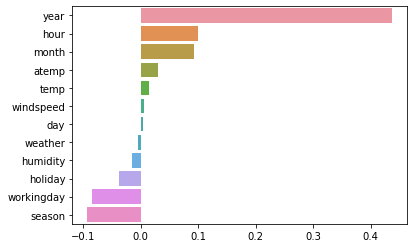

In [85]:
#由于是线性回归，评价指标值越低，得分越好。</br> 评价得分为差。 


# 可视化每个特征的回归系数值 
coef = pd.Series(lr_reg.coef_, index=X_train.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [86]:
# One-Hot Encoding 适用于训练和测试数据。 
#（因为训练数据和测试数据天数不同，所以减去了天数，回归系数值也低） 
train_df = pd.get_dummies(train_df, columns=['year', 'month', 'hour', 'holiday',
                                             'workingday', 'season', 'weather'])
test_df = pd.get_dummies(test_df, columns=['year', 'month', 'hour','holiday',
                                           'workingday', 'season', 'weather'])

In [87]:
print(train_df.shape)
print(test_df.shape)

(10886, 56)
(6493, 55)


In [88]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 56 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          10886 non-null  float64
 1   atemp         10886 non-null  float64
 2   humidity      10886 non-null  int64  
 3   windspeed     10886 non-null  float64
 4   count         10886 non-null  float64
 5   day           10886 non-null  int64  
 6   year_2011     10886 non-null  uint8  
 7   year_2012     10886 non-null  uint8  
 8   month_1       10886 non-null  uint8  
 9   month_2       10886 non-null  uint8  
 10  month_3       10886 non-null  uint8  
 11  month_4       10886 non-null  uint8  
 12  month_5       10886 non-null  uint8  
 13  month_6       10886 non-null  uint8  
 14  month_7       10886 non-null  uint8  
 15  month_8       10886 non-null  uint8  
 16  month_9       10886 non-null  uint8  
 17  month_10      10886 non-null  uint8  
 18  month_11      10886 non-nu

In [89]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 55 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          6493 non-null   float64
 1   atemp         6493 non-null   float64
 2   humidity      6493 non-null   int64  
 3   windspeed     6493 non-null   float64
 4   day           6493 non-null   int64  
 5   year_2011     6493 non-null   uint8  
 6   year_2012     6493 non-null   uint8  
 7   month_1       6493 non-null   uint8  
 8   month_2       6493 non-null   uint8  
 9   month_3       6493 non-null   uint8  
 10  month_4       6493 non-null   uint8  
 11  month_5       6493 non-null   uint8  
 12  month_6       6493 non-null   uint8  
 13  month_7       6493 non-null   uint8  
 14  month_8       6493 non-null   uint8  
 15  month_9       6493 non-null   uint8  
 16  month_10      6493 non-null   uint8  
 17  month_11      6493 non-null   uint8  
 18  month_12      6493 non-null 

In [90]:
# 应用align来匹配train_df和test_df的形状。 
#train_data和test_data的day值不正确。 
train_df, test_df = train_df.align(test_df, join='left', axis=1)
print(train_df.shape)
print(test_df.shape)
train_df.info()
test_df.info()

# 再次分离训练数据和测试数据（One-Hot Encoding 后） 
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(['count'], axis=1), train_df['count'], test_size=0.3)



(10886, 56)
(6493, 56)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 56 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          10886 non-null  float64
 1   atemp         10886 non-null  float64
 2   humidity      10886 non-null  int64  
 3   windspeed     10886 non-null  float64
 4   count         10886 non-null  float64
 5   day           10886 non-null  int64  
 6   year_2011     10886 non-null  uint8  
 7   year_2012     10886 non-null  uint8  
 8   month_1       10886 non-null  uint8  
 9   month_2       10886 non-null  uint8  
 10  month_3       10886 non-null  uint8  
 11  month_4       10886 non-null  uint8  
 12  month_5       10886 non-null  uint8  
 13  month_6       10886 non-null  uint8  
 14  month_7       10886 non-null  uint8  
 15  month_8       10886 non-null  uint8  
 16  month_9       10886 non-null  uint8  
 17  month_10      10886 non-null  uint8  
 18  mon

In [91]:
# 训练/预测/评估线性回归模型 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('LinearRegression RMSLE:', rmsle(y_test_exp, pred_exp))

LinearRegression RMSLE: inf


<ipython-input-91-10ce1ace237c>:7: RuntimeWarning: overflow encountered in expm1
  pred_exp = np.expm1(pred)


In [92]:
# Ridge 模型训练/预测/评估 
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
pred = ridge_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('Ridge RMSLE:', rmsle(y_test_exp, pred_exp))

Ridge RMSLE: 0.5791904520487303


In [93]:
# Lasso 模型训练/预测/评估 
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)
pred = lasso_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('Lasso RMSLE:', rmsle(y_test_exp, pred_exp))

Lasso RMSLE: 0.6292750940115586


<AxesSubplot:>

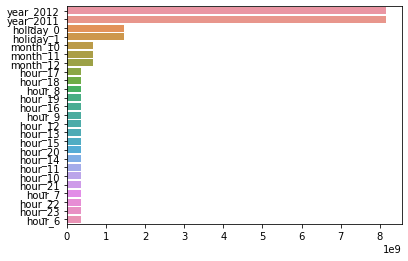

In [94]:
# 提取线性回归系数的前 25 个特征。 
coef = pd.Series(lr_reg.coef_, index=X_train.columns)
coef_sort = coef.sort_values(ascending=False)[:25]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

<AxesSubplot:>

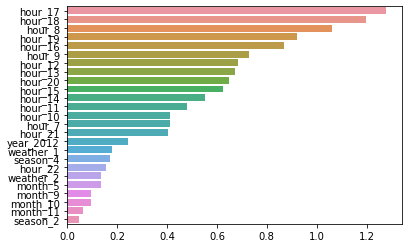

In [95]:
# 提取Ridge回归系数的前25个特征。
coef = pd.Series(ridge_reg.coef_, index=X_train.columns)
coef_sort = coef.sort_values(ascending=False)[:25]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

<AxesSubplot:>

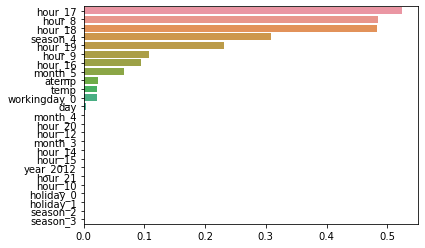

In [96]:
# 提取 Lasso 回归系数的前 25 个特征。 
coef = pd.Series(lasso_reg.coef_, index=X_train.columns)
coef_sort = coef.sort_values(ascending=False)[:25]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [97]:
#应用one-hot编码后，天气、季节、月份、周末/工作日、节假日等与出租次数相关的特征的回归系数值增大。



#基于树的回归 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [98]:
rf_reg = RandomForestRegressor(n_estimators=50)
rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('RandomForestRegressor RMSLE:', rmsle(y_test_exp, pred_exp))

RandomForestRegressor RMSLE: 0.3522445760546338


In [99]:
#超参数调优 


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression

# 使用 GridSearchCv 的超参数。 
tuned_parameters = {'n_estimators': [100,200,300,500], 'max_depth': [None, 1, 2, 3], 'min_samples_split': [1, 2, 3]}

rf_reg = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_log_error', n_jobs=-1, verbose=1)
rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('RandomForestRegressor RMSLE:', rmsle(y_test_exp, pred_exp))

rf_reg.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


D:\Anacond\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan -0.00852228 -0.00848179
 -0.00849859 -0.00850455 -0.00856175 -0.00848065 -0.00847425 -0.00847608
         nan         nan         nan         nan -0.07994075 -0.07996797
 -0.079953   -0.0799476  -0.07996744 -0.07998544 -0.07997466 -0.07993804
         nan         nan         nan         nan -0.06444644 -0.06445242
 -0.06445398 -0.06444372 -0.06447121 -0.06445269 -0.06443148 -0.06440717
         nan         nan         nan         nan -0.05064337 -0.05049632
 -0.05059201 -0.05059731 -0.0506974  -0.05067911 -0.05059335 -0.05058026]
  warnings.warn(


RandomForestRegressor RMSLE: 0.34714539357663127


{'max_depth': None, 'min_samples_split': 3, 'n_estimators': 300}

In [100]:
#预测(Prediction), 提交(Submission).


X_train = train_df.drop(['count'], axis=1)
y_train = train_df['count']

#测试数据 ( test.csv ) 
X_test = test_df

In [101]:
X_test.head(10)

,temp,atemp,humidity,windspeed,count,day,year_2011,year_2012,month_1,month_2,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,10.66,11.365,56,26.002700,NaN,20,1,0,1,0,...,0,1,1,0,0,0,1,0,0,0
1,10.66,13.635,56,12.631157,NaN,20,1,0,1,0,...,0,1,1,0,0,0,1,0,0,0
2,10.66,13.635,56,12.631157,NaN,20,1,0,1,0,...,0,1,1,0,0,0,1,0,0,0
3,10.66,12.880,56,11.001400,NaN,20,1,0,1,0,...,0,1,1,0,0,0,1,0,0,0
4,10.66,12.880,56,11.001400,NaN,20,1,0,1,0,...,0,1,1,0,0,0,1,0,0,0
5,9.84,11.365,60,15.001300,NaN,20,1,0,1,0,...,0,1,1,0,0,0,1,0,0,0
6,9.02,10.605,60,15.001300,NaN,20,1,0,1,0,...,0,1,1,0,0,0,1,0,0,0
7,9.02,10.605,55,15.001300,NaN,20,1,0,1,0,...,0,1,1,0,0,0,1,0,0,0
8,9.02,10.605,55,19.001200,NaN,20,1,0,1,0,...,0,1,1,0,0,0,1,0,0,0
9,9.84,11.365,52,15.001300,NaN,20,1,0,1,0,...,0,1,1,0,0,0,0,1,0,0


In [102]:
#将超参数应用于性能评估指标最高的 RandomForestRegressor 模型后，提交测试数据预测。 


# 返回一个已经通过 GridSearchCV 的 refit 训练过的估计器 
best_rf_reg = rf_reg.best_estimator_

# 使用带有 GridSearchCv 的最优参数化模型进行预测处理。
pred = best_rf_reg.predict(X_test)

pred_exp = np.expm1(pred)

print(pred[0:10])

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

D:\Anacond\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anacond\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

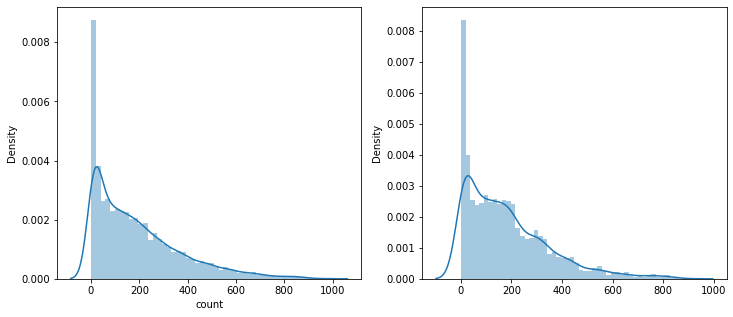

In [49]:
# 将实际值目标值与预测目标值图进行比较。 
y_train_exp = np.expm1(y_train)

fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train_exp,ax=ax1,bins=50)
sns.distplot(pred_exp,ax=ax2,bins=50)

In [51]:
#提交样本数据
submission = pd.read_csv('D:/学习资料/机器学习/bike-sharing-demand/sampleSubmission.csv')
submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [53]:
#将初始模型预测的值作为提交文件提交。
#调优后，提交文件改为submission_after_tunning。 


# 将预测值放入计数值中 
submission.loc[:, 'count'] = pred_exp
submission

ValueError: Must have equal len keys and value when setting with an iterable

In [54]:
# 您可以使用任何文件名进行提交。 
submission.to_csv('submission_after_tunning.csv', index=False)